# Experimento 01 – Multiplicação de Matrizes

A multiplicação de matrizes é uma operação muito utilizada na área de computação. Em  computação  gráfica  e  jogos  os  objetos  gráficos  no  vídeo  do  computador  são manipulados  através  da  multiplicação  de  matrizes  que  representam  transformações geométricas como: reflexões, contrações, rotações, projeções, translações etc. Enquanto muitas destas transformações são lineares, como por exemplo as reflexões, contrações e projeções,  as  translações  e  rotações  fora  da  origem  não  são  lineares  1.  Além  da computação  gráfica,  multiplicação  de  matrizes  são  utilizadas  na  área  de  Inteligência Artificial. A maioria das operações de deep learning e machine learning são em vetores e  matrizes.  Nos  links  abaixo  você  encontrará  as  informações  de  como  multiplicar matrizes. Fique à vontade para consultar outros sites sobre o assunto durante o laboratório.

- https://www.todamateria.com.br/multiplicacao-de-matrizes/
- https://brasilescola.uol.com.br/matematica/multiplicacao-matrizes.htm

Considerando a importância dessa operação matemática para a área de computação, cumpra as seguintes etapas propostas para o experimento.  
 
**Etapa I:** Implementar um programa sequencial na linguagem Python para multiplicação 
de duas matrizes NxN. Após a implementação faça os testes necessários.

**Etapa  II:**  Após  a  implementação  faça  uma  análise  do  desempenho  do  algoritmo 
implementado e calcule o tempo para a computação da operação considerando uma matriz 
de dimensão 500X500. Inicialize com dados aleatórios antes do processamento.  

**Etapa III:** Implementar um programa paralelo em Python usando Numba para 
multiplicação de duas matrizes NxN. Utilize um conjunto de 4 threads para o 
processamento paralelo.  

**[Etapa IV:](#etapa-iv)** Calcule o tempo para a computação da operação considerando uma matriz de 
dimensão 500X500 e conjuntos de 2, 4 e 9 threads. Inicialize com dados aleatórios antes 
do processamento. 

**Etapa V:** Calcule o SpeedUp da solução paralela proposta na etapa III. Indique no final 
do cálculo as informações de configuração do hardware utilizado (CPU, Clock, Cache, 
memória RAM e SO). 

### Exemplo de multiplicação de matrizes.
$$
    \begin{bmatrix}
        a_{11} & a_{12} & \cdots & a_{1n}\\
        a_{21} & a_{22} & \cdots & a_{2n}\\ 
        \vdots & \vdots & \ddots & \vdots\\ 
        a_{m1} & a_{m2} & \cdots & a_{mn} 
    \end{bmatrix}
    \times
    \begin{bmatrix}
        b_{11} & b_{12} & \cdots & b_{1p}\\
        b_{21} & b_{22} & \cdots & b_{2p}\\ 
        \vdots & \vdots & \ddots & \vdots\\ 
        b_{n1} & b_{n2} & \cdots & b_{np} 
    \end{bmatrix}
    =
    \begin{bmatrix}
        c_{11} & c_{12} & \cdots & c_{1p}\\
        c_{21} & c_{22} & \cdots & c_{2p}\\ 
        \vdots & \vdots & \ddots & \vdots\\ 
        c_{m1} & c_{m2} & \cdots & c_{mp} 
    \end{bmatrix}
$$
$$ c_{ij}= a_{i1} b_{1j} + a_{i2} b_{2j} +\cdots+ a_{in} + b_{nj} = \sum_{k=1}^n a_{ik}b_{kj} $$   

[Referência](https://www.physicsread.com/latex-matrix-multiplication/)

In [30]:
def print_matriz(A):
    """
    Função auxiliar para facilitar a visualização das matrizes
    """
    for row in (A):
        print(str(row).replace(',', ''))

In [31]:
# Dicionário para armazenar o tempo gasto com cada tipo de implementação
tempo_por_implementacao = dict()

## Etapa I

Implementar um programa sequencial na linguagem Python para multiplicação de duas matrizes NxN. Após a implementação faça os testes necessários.

In [32]:
def MM_python_sequencial(A, B):
    """
    Multiplicação de matrizes em Python calculada sequencialmente sem usar bibliotecas externas
    A: lista m x x
    B: lista n x p
    
    """
    # Testando se o número de linhas da primeira é igual ao número de colunas da segunda
    if len(A) != len(B[0]):
        raise ValueError('O número de linhas da primeira matriz deve ser igual ao número de colunas da segunda')
    
    C = []
    for i in range(len(A)):
        ci=[]
        for j in range(len(B[0])):
            cij = 0
            for k in range(len(A[0])):
                cij += A[i][k]*B[k][j]
            ci.append(cij)
        C.append(ci)
    
    return C

### Testando propriedade das matrizes

#### Uma matriz multiplicada pela sua inversa é igual a sua identidade

In [33]:
A = [
    [2, 1],
    [5, 3]
]

inv_A = [
    [3, -1],
    [-5, 2]
]

In [34]:
result = MM_python_sequencial(A, inv_A)
print_matriz(result)

[1 0]
[0 1]


Resultado esperado:
$$
    \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
    \end{bmatrix}
$$

#### Para a multiplicação, o número de linhas da primeira deve ser igual ao número de colunas da segunda, caso contrário é esperado um erro

In [35]:
B = [
    [9, 4, 0],
    [5, 4, 2],
    [1, 1, 6]
]

In [36]:
result = MM_python_sequencial(A, B)

ValueError: O número de linhas da primeira matriz deve ser igual ao número de colunas da segunda

Resultado esperado:

**ValueError: O número de linhas da primeira matriz deve ser igual ao número de colunas da segunda**

## Etapa II

Após  a  implementação  faça  uma  análise  do  desempenho  do  algoritmo implementado e calcule o tempo para a computação da operação considerando uma matriz de dimensão 500X500. Inicialize com dados aleatórios antes do processamento.  

In [37]:
import random
import time
random.seed(42)

In [38]:
# Criando matriz aleatória de números entre 0-9
ordem = 500
A = [[random.randint(0, 9) for j in range(ordem)] for i in range(ordem)]
B = [[random.randint(0, 9) for j in range(ordem)] for i in range(ordem)]

In [39]:
start_time = time.time()
result = MM_python_sequencial(A, B)
final_time_py_seq = time.time() - start_time
tempo_por_implementacao['sequencial'] = final_time_py_seq
print(f'Tempo de execução: {final_time_py_seq:.2f} segundos')

Tempo de execução: 27.74 segundos


## Etapa III

Implementar um programa paralelo em Python usando Numba para multiplicação de duas matrizes NxN. Utilize um conjunto de 4 threads para o processamento paralelo

In [40]:
from numba import njit, prange, set_num_threads
import numpy as np
set_num_threads(4)

In [41]:
@njit(parallel=True)
def MM_numba_parallel(A, B):
    """
    Multiplicação de matrizes em Python calculada sequencialmente sem usar bibliotecas externas
    A: matriz m x x
    B: matriz n x p
    
    """

    # Testando se o número de linhas da primeira é igual ao número de colunas da segunda
    if A.shape[1] != B.shape[0]:
        raise ValueError('O número de linhas da primeira matriz deve ser igual ao número de colunas da segunda')

    # Usando numpy para criar uma matriz vazia para que os valores de cada elemento da matriz possam ser colocados
    # em seu devido lugar paralelamente, sem precisar seguir uma ordem
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in prange(A.shape[0]):
        for j in prange(B.shape[1]):
            cij = 0
            for k in prange(A.shape[1]):
                cij += A[i,k] * B[k,j]
            C[i,j] = cij

    return C

In [42]:
start_time = time.time()
result = MM_numba_parallel(np.array(A), np.array(B))
final_time_py_numba4 = time.time() - start_time
print(f'Tempo de execução: {final_time_py_numba4:.2f} segundos')

Tempo de execução: 1.98 segundos


## Etapa IV

[Voltar ao topo](#experimento-01-–-multiplicação-de-matrizes)

Calcule o tempo para a computação da operação considerando uma matriz de dimensão 500X500 e conjuntos de 2, 4 e 9 threads. Inicialize com dados aleatórios antes do processamento. 

In [43]:
conjuntos_threads = [2, 4, 9]

In [47]:
conjuntos_threads = [2, 4, 9]
for num_thread in conjuntos_threads:
    set_num_threads(num_thread)
    start_time = time.time()
    result = MM_numba_parallel(np.array(A), np.array(B))
    final_time_py_numba = time.time() - start_time
    tempo_por_implementacao[f'paralelo {num_thread} threads'] = final_time_py_numba
    print(f'Tempo de execução para {num_thread} threads: {final_time_py_numba:.2f} segundos')

Tempo de execução para 2 threads: 0.20 segundos
Tempo de execução para 4 threads: 0.15 segundos


ValueError: The number of threads must be between 1 and 8

Como esperado, como meu computador só tem 8 núcleos lógicos, não foi possível rodar o código com 9 threads

## Etapa V

Calcule o SpeedUp da solução paralela proposta na etapa III. Indique no final do cálculo as informações de configuração do hardware utilizado (CPU, Clock, Cache, memória RAM e SO). 

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [211]:
df = pd.DataFrame(tempo_por_implementacao.items(), columns=['implementação', 'tempo'])

In [212]:
ganho_velocidade = df.copy()
ganho_velocidade = df.assign(
    ganho=(ganho_velocidade['tempo'] / ganho_velocidade['tempo'].shift(-1)).round(1),
    atual=ganho_velocidade['tempo'].shift(-1)
    ).rename(columns={'tempo':'anterior'}).dropna(axis=0)

In [213]:
ganho_velocidade

,implementação,anterior,ganho,atual
0,sequencial,27.738851,138.7,0.199991
1,paralelo 2 threads,0.199991,1.4,0.146608


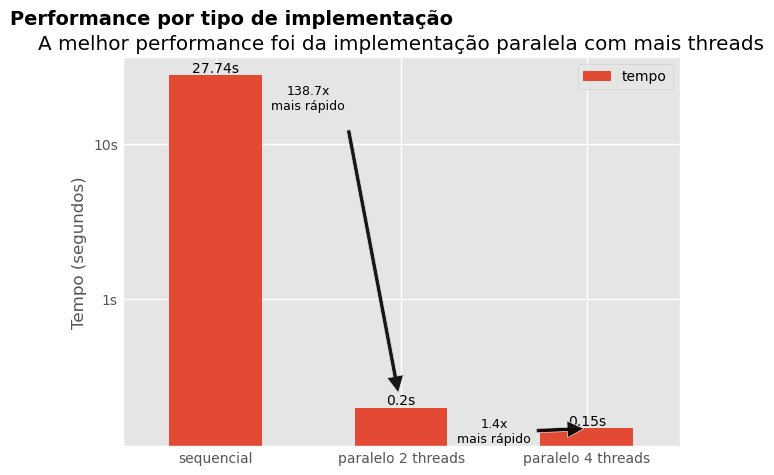

In [219]:
ax = df.plot(x='implementação', y='tempo', kind='bar')
for container in ax.containers:
    labels = [f'{i}s' for i in container.datavalues.round(2)]
    ax.bar_label(container, labels, fmt='%d')
plt.suptitle('Performance por tipo de implementação', weight='bold', x=0.25, size=14)
plt.title('A melhor performance foi da implementação paralela com mais threads',)
plt.yscale('log')
plt.ylabel('Tempo (segundos)')
plt.yticks([10**k for k in range(2)], [f'{10**k}s' for k in range(2)])
plt.xlabel('')
plt.xticks(rotation=0)
zip_items = zip(ganho_velocidade['ganho'], ganho_velocidade['anterior'], ganho_velocidade['atual'])
for index, (ganho, anterior, atual) in enumerate(zip_items):
    plt.annotate(f'{ganho}x\nmais rápido', xy=(index+1, atual), xytext=(index+0.5, anterior*0.6),
                arrowprops=dict(facecolor='black', shrink=0.05, width=3, alpha=0.9), ha='center', size=9)
plt.show()

### Configuração do hardware utilizado

<table>
  <tr>
    <th>CPU</th>
    <td>Intel Core i5-8250U</td>
  </tr>
  <tr>
    <th>CPU BASE CLOCK</th>
    <td>1.60 GHz</td>
  </tr>
    <tr>
    <th>CPU CACHE</th>
    <td>6 MB Intel® Smart Cache</td>
    </tr>
    <tr>
    <th>MEMÓRIA RAM</th>
    <td>8.0 GB</td>
  </tr>
    <tr>
    <th>SISTEMA OPERACIONAL</th>
    <td>Windows 10 Home v22H2</td>
  </tr>
</table>

## Sandbox

Tentando implementar a função `MM_numba_parallel` sem o uso do numpy

**SEM SUCESSO POR ENQUANTO**

In [ ]:
@njit(parallel=True)
def MM_numba_parallel(A, B):
    """
    Multiplicação de matrizes em Python calculada sequencialmente sem usar bibliotecas externas
    A: matriz m x x
    B: matriz n x p
    
    """

    # Testando se o número de linhas da primeira é igual ao número de colunas da segunda
    if len(A) != len(B[0]):
        raise ValueError('O número de linhas da primeira matriz deve ser igual ao número de colunas da segunda')

    # Usando numpy para criar uma matriz vazia para que os valores de cada elemento da matriz possam ser colocados
    # em seu devido lugar paralelamente, sem precisar seguir uma ordem
    C = [[0 for _ in prange(len(B[0]))] for _ in prange(len(A))]
    for i in prange(len(A)):
        for j in prange(len(B[0])):
            cij = 0
            for k in prange(len(A[0])):
                cij += A[i][k] * B[k][j]
            C[i][j] = cij

    return C